<a href="https://colab.research.google.com/github/nestorsgarzonc/Data-Science-Proyects/blob/master/R_test_course_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook R prob y estadistica

### Installing packages

In [1]:
install.packages("ggplot2")
install.packages("psych")
install.packages("dplyr")
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Loading packages

In [2]:
library("ggplot2")
library("psych")
library("dplyr")
library("readxl")


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Reading dataset from excel file

In [0]:
COVID_19 <- read_excel("Covid19_Colombia.xlsx")

### Show dataset

In [4]:
head(COVID_19)

Fecha de diagnostico,Ciudad de residencia,Localidad de residencia,Edad,Sexo,Tipo de caso,Ubicacion,Estado
<dttm>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
2020-04-10,Bogota,Usaquen,19,F,Importado,Casa,Recuperado
2020-04-10,Bogota,Engativa,22,F,Importado,Casa,Recuperado
2020-04-10,Bogota,Engativa,28,F,Importado,Casa,Recuperado
2020-04-10,Bogota,Fontibon,36,F,Importado,Casa,Recuperado
2020-04-10,Bogota,Kennedy,42,F,Importado,Casa,Recuperado
2020-04-10,Bogota,Suba,61,F,Importado,Casa,Recuperado


In [5]:
tail(COVID_19)

Fecha de diagnostico,Ciudad de residencia,Localidad de residencia,Edad,Sexo,Tipo de caso,Ubicacion,Estado
<dttm>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
2020-05-08,Bogota,Rafael Uribe Uribe,31,M,En estudio,Casa,Moderado
2020-05-08,Bogota,Los Martires,32,F,En estudio,Casa,Moderado
2020-05-08,Bogota,Rafael Uribe Uribe,63,M,En estudio,Casa,Moderado
2020-05-09,Bogota,Sin Dato,21,M,En estudio,Casa,Moderado
2020-05-09,Bogota,Sin Dato,29,M,En estudio,Casa,Moderado
2020-05-08,Fuera de Bogota,Fuera de Bogota,36,F,Relacionado,Casa,Moderado


In [6]:
str(COVID_19)

tibble [4,028 × 8] (S3: tbl_df/tbl/data.frame)
 $ Fecha de diagnostico   : POSIXct[1:4028], format: "2020-04-10" "2020-04-10" ...
 $ Ciudad de residencia   : chr [1:4028] "Bogota" "Bogota" "Bogota" "Bogota" ...
 $ Localidad de residencia: chr [1:4028] "Usaquen" "Engativa" "Engativa" "Fontibon" ...
 $ Edad                   : num [1:4028] 19 22 28 36 42 61 73 54 54 23 ...
 $ Sexo                   : chr [1:4028] "F" "F" "F" "F" ...
 $ Tipo de caso           : chr [1:4028] "Importado" "Importado" "Importado" "Importado" ...
 $ Ubicacion              : chr [1:4028] "Casa" "Casa" "Casa" "Casa" ...
 $ Estado                 : chr [1:4028] "Recuperado" "Recuperado" "Recuperado" "Recuperado" ...


In [7]:
dim(COVID_19)

[1] 4028    8

In [8]:
colnames(COVID_19)

[1] "Fecha de diagnostico"    "Ciudad de residencia"   
[3] "Localidad de residencia" "Edad"                   
[5] "Sexo"                    "Tipo de caso"           
[7] "Ubicacion"               "Estado"

In [0]:
COVID_19$`Ciudad de residencia` <- as.factor(COVID_19$`Ciudad de residencia`)


In [10]:
str(COVID_19)

tibble [4,028 × 8] (S3: tbl_df/tbl/data.frame)
 $ Fecha de diagnostico   : POSIXct[1:4028], format: "2020-04-10" "2020-04-10" ...
 $ Ciudad de residencia   : Factor w/ 2 levels "Bogota","Fuera de Bogota": 1 1 1 1 1 1 1 1 1 1 ...
 $ Localidad de residencia: chr [1:4028] "Usaquen" "Engativa" "Engativa" "Fontibon" ...
 $ Edad                   : num [1:4028] 19 22 28 36 42 61 73 54 54 23 ...
 $ Sexo                   : chr [1:4028] "F" "F" "F" "F" ...
 $ Tipo de caso           : chr [1:4028] "Importado" "Importado" "Importado" "Importado" ...
 $ Ubicacion              : chr [1:4028] "Casa" "Casa" "Casa" "Casa" ...
 $ Estado                 : chr [1:4028] "Recuperado" "Recuperado" "Recuperado" "Recuperado" ...


In [0]:
COVID_19 <- as.data.frame(unclass(COVID_19))

In [12]:
str(COVID_19)

'data.frame':	4028 obs. of  8 variables:
 $ Fecha.de.diagnostico   : POSIXct, format: "2020-04-10" "2020-04-10" ...
 $ Ciudad.de.residencia   : Factor w/ 2 levels "Bogota","Fuera de Bogota": 1 1 1 1 1 1 1 1 1 1 ...
 $ Localidad.de.residencia: Factor w/ 21 levels "Antonio Narino",..: 20 6 6 7 9 17 6 17 6 7 ...
 $ Edad                   : num  19 22 28 36 42 61 73 54 54 23 ...
 $ Sexo                   : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 2 1 2 ...
 $ Tipo.de.caso           : Factor w/ 4 levels "Desconocido",..: 3 3 3 3 3 3 3 3 4 4 ...
 $ Ubicacion              : Factor w/ 5 levels "Casa","Fallecido",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Estado                 : Factor w/ 6 levels "(No causa Directa)",..: 5 5 5 5 5 5 5 5 5 5 ...


In [13]:
#Ver nivelres de una variable
unique(COVID_19$Sexo)

[1] F M
Levels: F M

In [14]:
install.packages('modeest')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘rmutil’, ‘clue’, ‘fBasics’, ‘stable’, ‘stabledist’, ‘statip’




In [15]:
library('modeest')

Registered S3 method overwritten by 'rmutil':
  method         from 
  plot.residuals psych



**`attach` Destructura las columnas del df en variables globales**

In [0]:
attach(COVID_19)

In [17]:
mean(Edad)

[1] 40.65889

In [18]:
median(Edad)

[1] 38

In [19]:
mfv(Edad) #Moda

[1] 30

Percentiles

Tener cuidado 0%125%2750%3875%54100%103

Es 0%:1 25%:27 50%:38 75%:54 100%:103

In [20]:
quantile(Edad)

0%  25%  50%  75% 100% 
   1   27   38   54  103

In [21]:
quantile(Edad, c(0.1, 0.26, 0.78))

10%  26%  78% 
18.7 28.0 56.0

In [22]:
summary(COVID_19)

 Fecha.de.diagnostico               Ciudad.de.residencia
 Min.   :2020-03-13 00:00:00   Bogota         :3989     
 1st Qu.:2020-04-07 00:00:00   Fuera de Bogota:  39     
 Median :2020-04-23 00:00:00                            
 Mean   :2020-04-19 20:51:14                            
 3rd Qu.:2020-05-03 00:00:00                            
 Max.   :2020-05-09 00:00:00                            
                                                        
   Localidad.de.residencia      Edad        Sexo          Tipo.de.caso 
 Kennedy       : 774       Min.   :  1.00   F:2001   Desconocido: 125  
 Suba          : 430       1st Qu.: 27.00   M:2027   En estudio :2609  
 Engativa      : 350       Median : 38.00            Importado  : 350  
 Bosa          : 330       Mean   : 40.66            Relacionado: 944  
 Usaquen       : 318       3rd Qu.: 54.00                              
 Ciudad Bolivar: 226       Max.   :103.00                              
 (Other)       :1600                    

In [23]:
summary(Edad)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   27.00   38.00   40.66   54.00  103.00 

In [24]:
Edad_agr<-COVID_19 %>% group_by(Tipo.de.caso) %>% summarise(mean(Edad))
Edad_agr

Tipo.de.caso,mean(Edad)
<fct>,<dbl>
Desconocido,50.26400
En estudio,41.03066
Importado,43.29143
Relacionado,37.38347


In [25]:
range(Edad)

[1]   1 103

In [26]:
colnames(COVID_19)

[1] "Fecha.de.diagnostico"    "Ciudad.de.residencia"   
[3] "Localidad.de.residencia" "Edad"                   
[5] "Sexo"                    "Tipo.de.caso"           
[7] "Ubicacion"               "Estado"

In [27]:
var(Edad)

[1] 350.1712

In [0]:
n <- length(Edad)

Varianza poblacional

In [29]:
varp <-(n-1)/n*var(Edad)
varp

[1] 350.0842

In [30]:
sqrt(varp)

[1] 18.71054

In [31]:
sd(Edad)

[1] 18.71286

Que tan lejos estan mis datos de la media

In [32]:
mean(Edad)-sd(Edad)

[1] 21.94603

In [41]:
#Analizar distribucion datos con describe
describe(COVID_19, check=FALSE)

Converted non-numeric matrix input to numeric.  Are you sure you wanted to do this. Please check your data

Warning message in matrix(as.numeric(x), ncol = nvar):
“NAs introduced by coercion”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”
Warni

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fecha.de.diagnostico*,1,4028,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Ciudad.de.residencia*,2,4028,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Localidad.de.residencia*,3,4028,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Edad*,4,4028,40.65889,18.71286,38,39.9969,19.2738,1,103,102,0.3444343,-0.296616,0.2948462
Sexo*,5,4028,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Tipo.de.caso*,6,4028,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Ubicacion*,7,4028,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Estado*,8,4028,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA


In [36]:
str(COVID_19)

'data.frame':	4028 obs. of  8 variables:
 $ Fecha.de.diagnostico   : POSIXct, format: "2020-04-10" "2020-04-10" ...
 $ Ciudad.de.residencia   : Factor w/ 2 levels "Bogota","Fuera de Bogota": 1 1 1 1 1 1 1 1 1 1 ...
 $ Localidad.de.residencia: Factor w/ 21 levels "Antonio Narino",..: 20 6 6 7 9 17 6 17 6 7 ...
 $ Edad                   : num  19 22 28 36 42 61 73 54 54 23 ...
 $ Sexo                   : Factor w/ 2 levels "F","M": 1 1 1 1 1 1 1 2 1 2 ...
 $ Tipo.de.caso           : Factor w/ 4 levels "Desconocido",..: 3 3 3 3 3 3 3 3 4 4 ...
 $ Ubicacion              : Factor w/ 5 levels "Casa","Fallecido",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Estado                 : Factor w/ 6 levels "(No causa Directa)",..: 5 5 5 5 5 5 5 5 5 5 ...


# Libreria grafica

In [42]:
install.packages('fdth')
library(fdth)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xtable’



Attaching package: ‘fdth’


The following object is masked from ‘package:modeest’:

    mfv


The following objects are masked from ‘package:stats’:

    sd, var




In [44]:
Tabla_frec <- fdt(Edad, breaks='Sturges')
Tabla_frec

Class limits,f,rf,rf(%),cf,cf(%)
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"[0.99,8.91615)",132,0.0327706058,3.27706058,132,3.277061
"[8.91615,16.8423)",192,0.0476663357,4.76663357,324,8.043694
"[16.8423,24.7685)",444,0.1102284012,11.02284012,768,19.066534
"[24.7685,32.6946)",766,0.1901688183,19.01688183,1534,38.083416
"[32.6946,40.6208)",655,0.1626117180,16.26117180,2189,54.344588
"[40.6208,48.5469)",530,0.1315789474,13.15789474,2719,67.502483
"[48.5469,56.4731)",453,0.1124627607,11.24627607,3172,78.748759
"[56.4731,64.3992)",382,0.0948361470,9.48361470,3554,88.232373
"[64.3992,72.3254)",240,0.0595829196,5.95829196,3794,94.190665


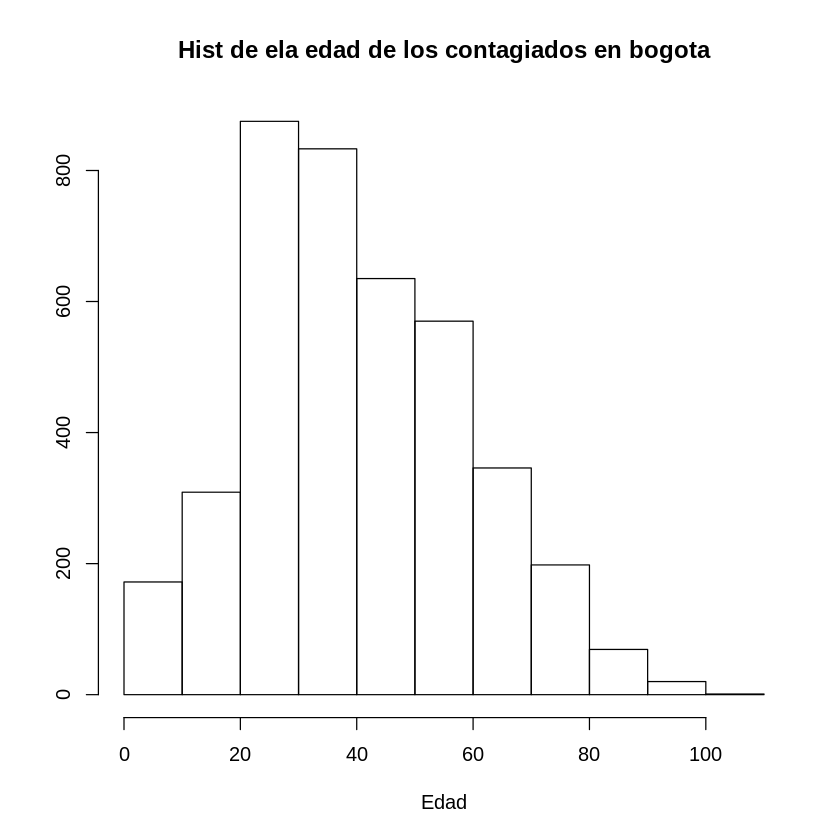

In [45]:
#histograma
hist(Edad, freq=T, main='Hist de ela edad de los contagiados en bogota', xlab='Edad', ylab='')